# **Galena Wagdy Zareef-20399124-DMCompetition1**


## Wish.com Product Rating Prediction

### Why Data Mining is a misnomer? What is another preferred name?
#### because the goal is the extraction of patterns and knowledge from large amounts of data, knowledge discovery
###  What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
#### Selection, Pre-processing,Transformation, Data Mining, Interpretation, Evaluation, Deployment. Data engineers build the pipelines that collect and deliver data for data scientists. Data scientists are the people who analyze data, create algorithms and make predictions based on that data.
###  In data mining, what is the difference between prediction and categorization?
#### Classification is the process of identifying which category a new observation belongs to based on a training data set containing observations whose category membership is known. Predication is the process of identifying the missing or unavailable numerical data for a new observation.
### Why data science/machine learning is a bad idea in the context of information security?
#### Data science and machine learning are not inherently bad ideas in the context of information security, but there are certain risks and challenges involved in their implementation
### What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
#### Confidentiality, integrity and availability. as how is a model designed to guide policies for information security within an organization

### Define the problem.
#### Wish.com Product Rating Prediction
### What is the input?
####  33 features ['retail_price', 'currency_buyer', 'units_sold', 'uses_ad_boosts','rating', 'rating_count', 'badges_count', 'badge_local_product','badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color','product_variation_size_id', 'product_variation_inventory','shipping_option_name', 'shipping_option_price', 'shipping_is_express','countries_shipped_to', 'inventory_total', 'has_urgency_banner','urgency_text', 'origin_country', 'merchant_title', 'merchant_name','merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating','merchant_id', 'merchant_has_profile_picture','merchant_profile_picture', 'theme', 'crawl_month', 'id']
### What is the output?
#### the predicted product rating categories from 1 to 5
### What data mining function is required?
#### classification using machine learning algorithm
### What could be the challenges? 
#### data preorocessing and choosing the prediction model 
### What is the impact?
#### understand the customer need
### What is an ideal solution?
#### Decision Tree Classifier

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cisc-873-dm-w23-a1/test_new.csv
/kaggle/input/cisc-873-dm-w23-a1/train_new.csv
/kaggle/input/cisc-873-dm-w23-a1/sample_submission_new.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DC
from sklearn import tree

In [4]:
df = pd.read_csv('/kaggle/input/cisc-873-dm-w23-a1/train_new.csv',index_col=0)
print(type(df))
df.head(5)

<class 'pandas.core.frame.DataFrame'>


,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
price,,,,,,,,,,,,,,,,,,,,,
8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
8.00,7,EUR,1000,0,4.0,843,1,1,0,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
6.00,34,EUR,100,0,4.0,10,0,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
4.67,4,EUR,100,1,3.0,82,0,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
8.00,11,EUR,1000,0,4.0,127,0,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [5]:
df.describe()

,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [6]:
df.columns

Index(['retail_price', 'currency_buyer', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [7]:
df.dtypes

retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
urgency_text                     object
origin_country                   object
merchant_title                   object
merchant_name                    object
merchant_info_subtitle           object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1094 entries, 8.0 to 7.0
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   retail_price                  1094 non-null   int64  
 1   currency_buyer                1094 non-null   object 
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   object 
 11  product_color                 1065 non-null   object 
 12  product_variation_size_id     1082 non-null   object 
 13  

In [9]:
df = df.drop_duplicates()

In [10]:
df.isna().sum()

retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [11]:
df.isnull().sum()

retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [12]:
df.isnull().any()

retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_total                 False
has_urgency_banner               True
urgency_text                     True
origin_country                   True
merchant_title                  False
merchant_name                    True
merchant_info_subtitle          False
merchant_rating_count           False
merchant_rat

In [13]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [14]:
df.eq(0).sum(axis=0)

retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                   621
rating                             0
rating_count                      30
badges_count                     979
badge_local_product             1073
badge_product_quality           1003
badge_fast_shipping             1081
tags                               0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express             1091
countries_shipped_to               0
inventory_total                    0
has_urgency_banner               745
urgency_text                       0
origin_country                     0
merchant_title                     0
merchant_name                      0
merchant_info_subtitle             0
merchant_rating_count              0
merchant_rating                    0
m

In [15]:
# for i in df.columns:
#     countvalues = df[i].unique()
#     isnu = df[i].isnull().sum()
#     print(i," ",isnu," :",countvalues)

In [16]:
countvalues = df['product_variation_size_id'].unique()
isnu = df['product_variation_size_id'].isnull().sum()
print("product_variation_size_id ",isnu," :",countvalues)

product_variation_size_id  12  : ['M' 'L' 'XS' 'S' 'XL' '26(Waist 72cm 28inch)' 'S.' 'S(bust 88cm)' 'XXS'
 's' '29' nan 'choose a size' 'XXXS' 'Base Coat' 'Size M' 'XXL' 'M.' 'XS.'
 '100 x 100cm(39.3 x 39.3inch)' '2pcs' '4XL' '1' '25-S' 'Size-XXS'
 '5PAIRS' '35' 'Pack of 1' 'Size S' 'Size-S' '6XL' '25' 'S/M(child)' '60'
 'Size-XS' 'S (waist58-62cm)' 'SIZE XXS' '10 ml' 'X   L' 'Women Size 36'
 '04-3XL' 'Size -XXS' '1 pc.' 'Floating Chair for Kid' 'S Pink' '34'
 'US-S' 'Size XXS' 'pants-S' 'XXXXL' 'SIZE-XXS' 'SIZE XS' '1pc' 'Size S.'
 '100 cm' 'S..' 'Round' '4-5 Years' '5' '33' '30 cm' '2' 'XXXXXL'
 '20PCS-10PAIRS' '2XL' 'Size-5XL' 'Size4XL' 'One Size' 'size S' 'Size/S'
 'B' 'SizeL' '20pcs' '1 PC - XL' 'Suit-S' 'Base & Top & Matte Top Coat'
 'Baby Float Boat' '1m by 3m' 'SIZE S' 'White' '40 cm' '5XL' '10pcs' 'H01']


In [17]:
df['product_variation_size_id'].value_counts()

S           444
XS          248
M           135
XXS          76
L            29
           ... 
pants-S       1
XXXXL         1
SIZE-XXS      1
1pc           1
H01           1
Name: product_variation_size_id, Length: 83, dtype: int64

In [18]:
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XS','xs','XS.','Size-XS','SIZE XS'], 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XXS','xxs','SIZE XXS','Size -XXS','SIZE-XXS','Size-XXS','Size XXS'], '2XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XXXS','xxxs'], '3XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['S.','US-S','Size S','s','S(bust 88cm)','25-S','Size S','Size-S','S (waist58-62cm)','S Pink','pants-S','Size S.','S..','size S','Size/S','Suit-S','SIZE S'], 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['M.','Size M','m'], 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['SizeL'], 'L')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['X   L','1 PC - XL'], 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XXL'], '2XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XXXL','04-3XL'], '3XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XXXXL','Size4XL'], '4XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['XXXXXL','Size-5XL'], '5XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace(['26(Waist 72cm 28inch)' ,'29','choose a size', 'Base Coat' ,'100 x 100cm(39.3 x 39.3inch)','2pcs', '1' ,'5PAIRS', '35', 'Pack of 1','25' ,'S/M(child)' ,'60','10 ml', 'Women Size 36', '04-3XL', '1 pc.' ,'Floating Chair for Kid', '34' ,'1pc', '100 cm' ,'Round' ,'4-5 Years', '5','33' ,'30 cm' ,'2' ,'20PCS-10PAIRS', 'One Size', 'B', '20pcs','Base & Top & Matte Top Coat', 'Baby Float Boat' ,'1m by 3m' ,'White','40 cm' ,'10pcs' ,'H01'], 'unknown')

In [19]:
countvalues = df['product_variation_size_id'].unique()
isnu = df['product_variation_size_id'].isnull().sum()
print("product_variation_size_id ",isnu," :",countvalues)

product_variation_size_id  12  : ['M' 'L' 'XS' 'S' 'XL' 'unknown' '2XS' nan '3XS' '2XL' '4XL' '6XL' '3XL'
 '5XL']


In [20]:
df['product_color'].value_counts()

black             219
white             173
blue               77
yellow             69
pink               68
                 ... 
claret              1
brown & yellow      1
whitestripe         1
Pink                1
light green         1
Name: product_color, Length: 87, dtype: int64

In [21]:
df['product_color'] = df['product_color'].replace(['gray','lightgrey','lightgray'], 'grey')
df['product_color'] = df['product_color'].replace(['floral','leopard','army','camouflage','leopardprint','pink & grey','black & yellow','white & black','pink & white','blackwhite','black & blue','winered & yellow','rainbow','pink & blue','white & green','black & green','black & white','navyblue & white','brown & yellow', 'blue & pink','pink & black',], 'multicolor')
df['product_color'] = df['product_color'].replace(['navyblue','lightblue','skyblue','darkblue','navy','navy blue','lakeblue','Blue','denimblue'], 'blue')
df['product_color'] = df['product_color'].replace(['lightyellow ','gold','star','lightyellow','apricot'], 'yellow')
df['product_color'] = df['product_color'].replace(['watermelonred','winered','rosered','rose','orange-red','wine red','RED','burgundy','lightred','wine','claret'], 'red')
df['product_color'] = df['product_color'].replace(['light green','darkgreen','armygreen','fluorescentgreen','Army green','applegreen','lightgreen','mintgreen'], 'green')
df['product_color'] = df['product_color'].replace(['silver','offwhite','whitestripe','White','whitefloral'], 'white')
df['product_color'] = df['product_color'].replace(['violet'], 'purple')
df['product_color'] = df['product_color'].replace(['coffee','beige','nude','khaki','ivory','camel'], 'brown')
df['product_color'] = df['product_color'].replace(['lightpink','dustypink','Pink','rosegold','Rose red'], 'pink')
df['product_color'] = df['product_color'].replace(['coolblack','Black'], 'black')

In [22]:
df['product_color'].value_counts()

black         224
white         181
blue          122
red           100
green          95
pink           77
yellow         73
grey           56
multicolor     54
purple         38
brown          29
orange         16
Name: product_color, dtype: int64

In [23]:
countvalues = df['crawl_month'].unique()
isnu = df['crawl_month'].isnull().sum()
print("crawl_month ",isnu," :",countvalues)

crawl_month  0  : ['2020-08']


In [24]:
countvalues = df['currency_buyer'].unique()
isnu = df['currency_buyer'].isnull().sum()
print("currency_buyer ",isnu," :",countvalues)

currency_buyer  0  : ['EUR']


In [25]:
countvalues = df['theme'].unique()
isnu = df['theme'].isnull().sum()
print("theme ",isnu," :",countvalues)

theme  0  : ['summer']


In [26]:
countvalues = df['origin_country'].unique()
isnu = df['origin_country'].isnull().sum()
print("origin_country ",isnu," :",countvalues)

origin_country  12  : ['CN' 'US' 'GB' nan 'SG' 'VE']


In [27]:
df.drop(['crawl_month','currency_buyer','theme','merchant_has_profile_picture', 'merchant_profile_picture','merchant_title' ,'merchant_name', 'merchant_info_subtitle','urgency_text','has_urgency_banner', 'merchant_rating_count', 'merchant_rating', 'merchant_id'],inplace=True,axis = 1)

In [28]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [29]:
df

,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,id
price,,,,,,,,,,,,,,,,,,,,
8.00,7,10000,1,4.0,1670,0,0,0,0,562,11,8,50,4,3,0,30,50,0,272
8.00,7,1000,0,4.0,843,1,1,0,0,650,0,7,50,4,3,0,37,50,0,1515
6.00,34,100,0,4.0,10,0,0,0,0,493,10,7,50,4,2,0,41,50,0,940
4.67,4,100,1,3.0,82,0,0,0,0,410,1,11,5,4,1,0,25,50,0,309
8.00,11,1000,0,4.0,127,0,0,0,0,225,11,9,50,4,3,0,15,50,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.00,4,10000,0,4.0,2150,0,0,0,0,768,9,9,50,4,1,0,41,50,0,1381
5.00,5,1000,0,5.0,377,1,0,1,0,9,-1,12,31,4,2,0,35,50,0,212
9.00,48,1000,1,4.0,135,0,0,0,0,458,8,8,50,4,3,0,25,50,0,163


In [30]:
df = df.replace(np.nan, 'other')

In [31]:
df.corr()['rating']

retail_price                   0.086251
units_sold                     0.011729
uses_ad_boosts                -0.047359
rating                         1.000000
rating_count                   0.025344
badges_count                   0.234001
badge_local_product            0.009850
badge_product_quality          0.273749
badge_fast_shipping            0.042029
tags                           0.016505
product_color                 -0.070776
product_variation_size_id      0.065903
product_variation_inventory    0.048443
shipping_option_name           0.041659
shipping_option_price          0.202719
shipping_is_express            0.059141
countries_shipped_to           0.024565
inventory_total               -0.116458
origin_country                -0.071587
id                             0.058845
Name: rating, dtype: float64

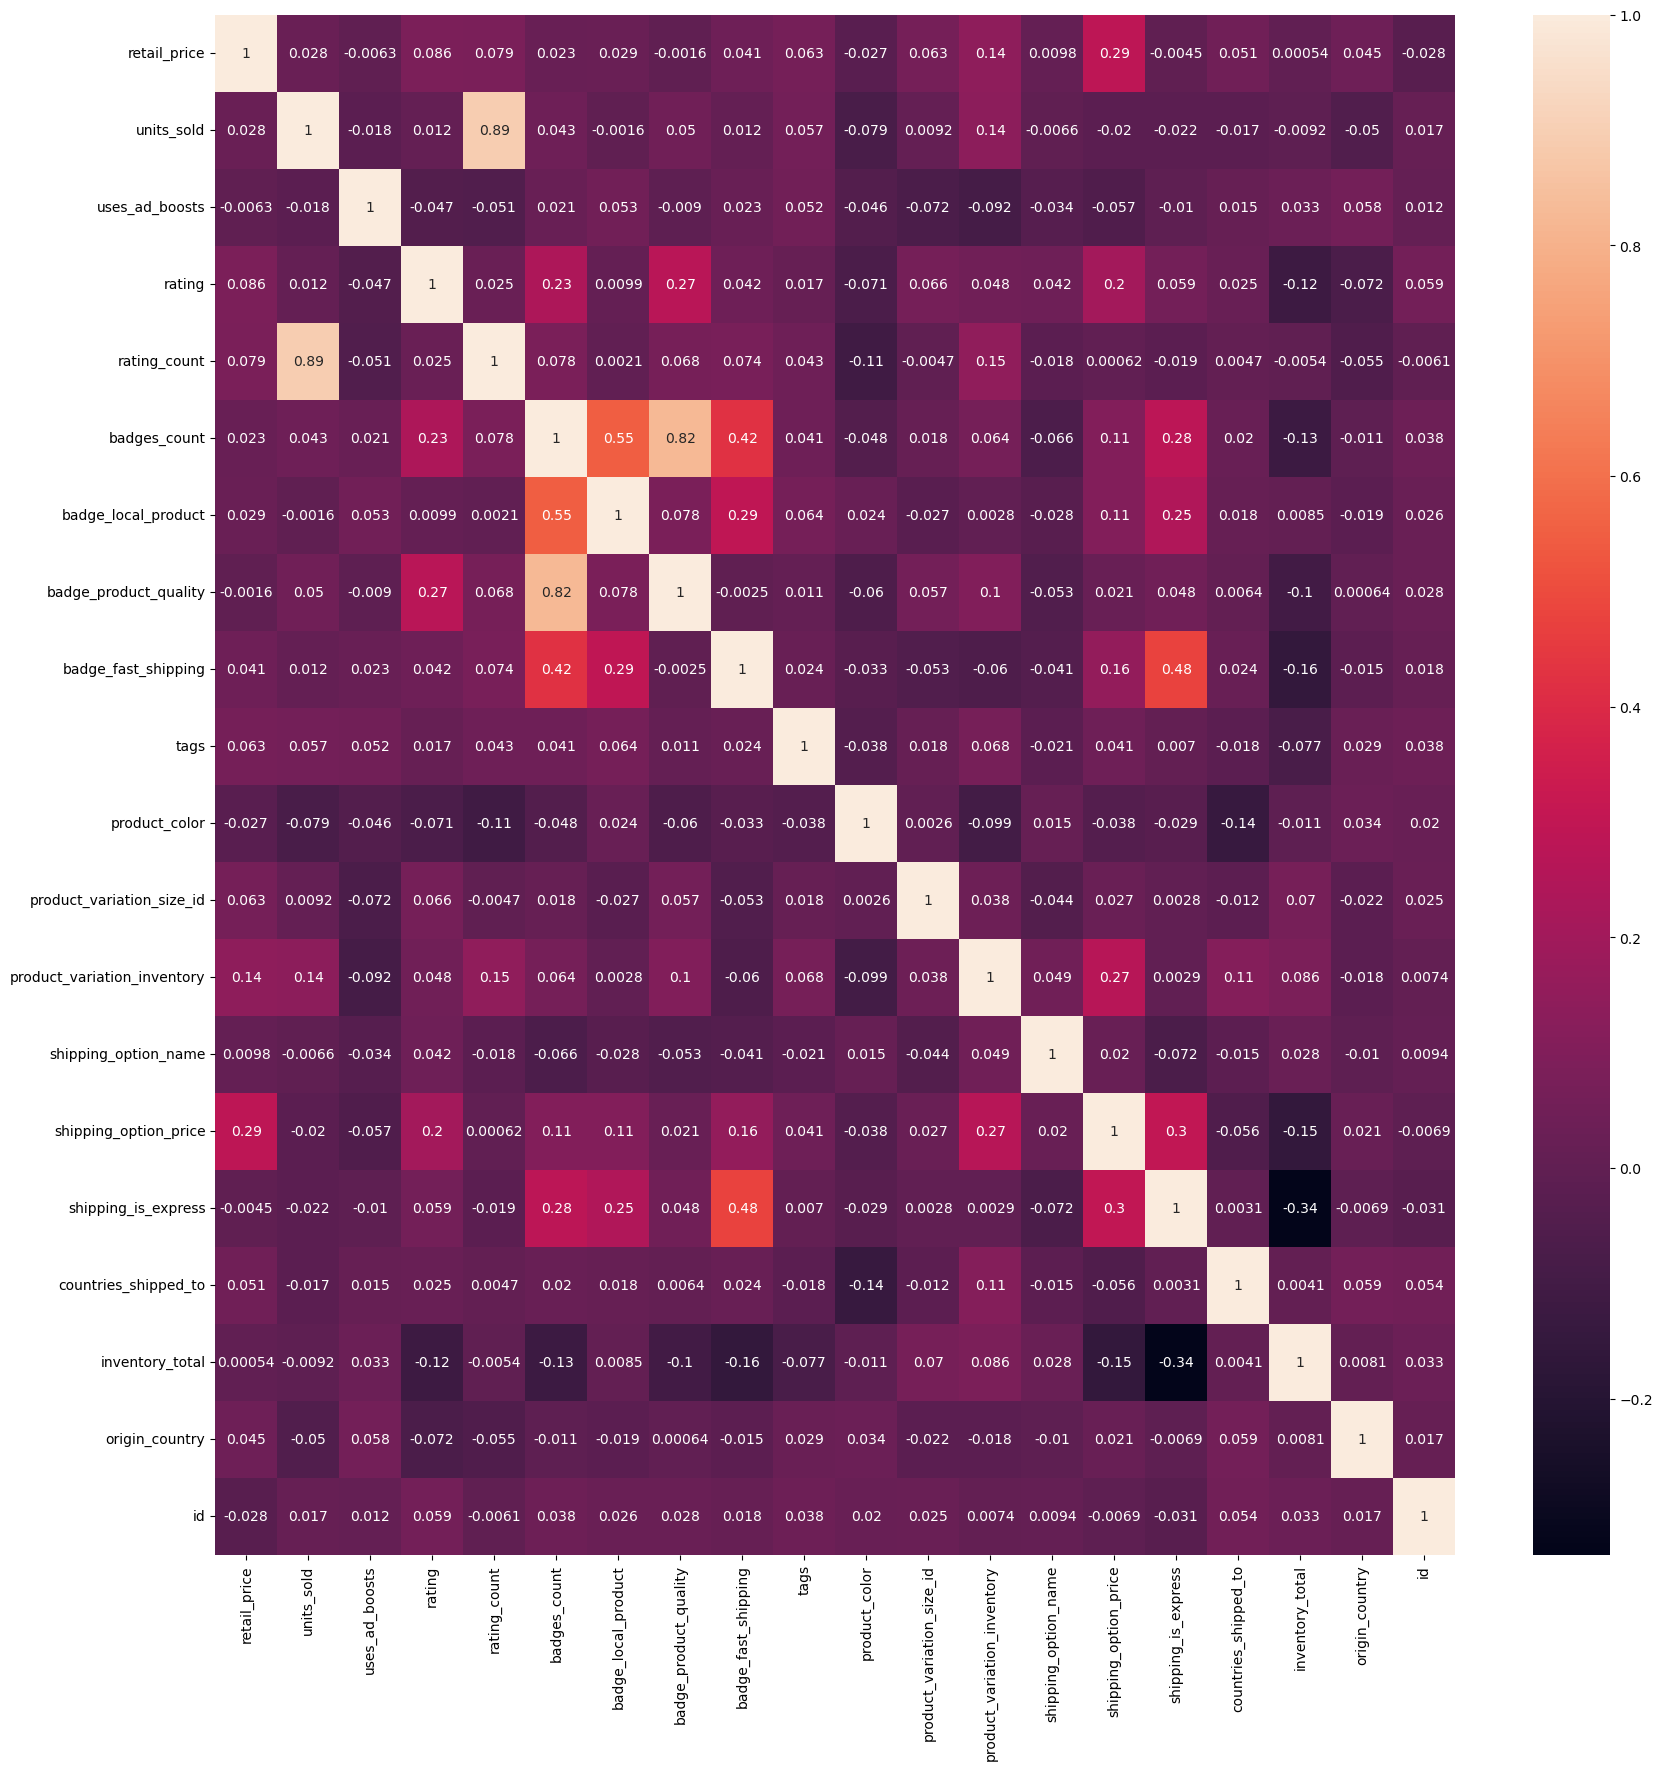

In [32]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, annot=True)

In [33]:
df.columns

Index(['retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country', 'id'],
      dtype='object')

In [34]:
test = pd.read_csv('/kaggle/input/cisc-873-dm-w23-a1/test_new.csv',index_col=0)
print(type(test))
test.head(5)

<class 'pandas.core.frame.DataFrame'>


,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
price,,,,,,,,,,,,,,,,,,,,,
5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [35]:
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XS','xs','XS.','Size-XS','SIZE XS'], 'XS')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XXS','xxs','SIZE XXS','Size -XXS','SIZE-XXS','Size-XXS','Size XXS'], '2XS')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XXXS','xxxs'], '3XS')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['S.','US-S','Size S','s','S(bust 88cm)','25-S','Size S','Size-S','S (waist58-62cm)','S Pink','pants-S','Size S.','S..','size S','Size/S','Suit-S','SIZE S'], 'S')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['M.','Size M','m'], 'M')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['SizeL'], 'L')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['X   L','1 PC - XL'], 'XL')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XXL'], '2XL')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XXXL','04-3XL'], '3XL')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XXXXL','Size4XL'], '4XL')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['XXXXXL','Size-5XL'], '5XL')
test['product_variation_size_id'] = test['product_variation_size_id'].replace(['26(Waist 72cm 28inch)' ,'29','choose a size', 'Base Coat' ,'100 x 100cm(39.3 x 39.3inch)','2pcs', '1' ,'5PAIRS', '35', 'Pack of 1','25' ,'S/M(child)' ,'60','10 ml', 'Women Size 36', '04-3XL', '1 pc.' ,'Floating Chair for Kid', '34' ,'1pc', '100 cm' ,'Round' ,'4-5 Years', '5','33' ,'30 cm' ,'2' ,'20PCS-10PAIRS', 'One Size', 'B', '20pcs','Base & Top & Matte Top Coat', 'Baby Float Boat' ,'1m by 3m' ,'White','40 cm' ,'10pcs' ,'H01'], 'unknown')

In [36]:
test['product_color'] = test['product_color'].replace(['gray','lightgrey','lightgray'], 'grey')
test['product_color'] = test['product_color'].replace(['floral','leopard','army','camouflage','leopardprint','pink & grey','black & yellow','white & black','pink & white','blackwhite','black & blue','winered & yellow','rainbow','pink & blue','white & green','black & green','black & white','navyblue & white','brown & yellow', 'blue & pink','pink & black',], 'multicolor')
test['product_color'] = test['product_color'].replace(['navyblue','lightblue','skyblue','darkblue','navy','navy blue','lakeblue','Blue','denimblue'], 'blue')
test['product_color'] = test['product_color'].replace(['lightyellow ','gold','star','lightyellow','apricot'], 'yellow')
test['product_color'] = test['product_color'].replace(['watermelonred','winered','rosered','rose','orange-red','wine red','RED','burgundy','lightred','wine','claret'], 'red')
test['product_color'] = test['product_color'].replace(['light green','darkgreen','armygreen','fluorescentgreen','Army green','applegreen','lightgreen','mintgreen'], 'green')
test['product_color'] = test['product_color'].replace(['silver','offwhite','whitestripe','White','whitefloral'], 'white')
test['product_color'] = test['product_color'].replace(['violet'], 'purple')
test['product_color'] = test['product_color'].replace(['coffee','beige','nude','khaki','ivory','camel'], 'brown')
test['product_color'] = test['product_color'].replace(['lightpink','dustypink','Pink','rosegold','Rose red'], 'pink')
test['product_color'] = test['product_color'].replace(['coolblack','Black'], 'black')

In [37]:
test.drop(['crawl_month','currency_buyer','theme','merchant_has_profile_picture', 'merchant_profile_picture','merchant_title' ,'merchant_name', 'merchant_info_subtitle','urgency_text','has_urgency_banner', 'merchant_rating_count', 'merchant_rating', 'merchant_id'],inplace=True,axis = 1)

In [38]:
test_converted = test.copy()
for col_name in test_converted.columns:
    if(test_converted[col_name].dtype == 'object'):
        test_converted[col_name] = test_converted[col_name].astype('category')
        test_converted[col_name] = test_converted[col_name].cat.codes

In [39]:
test_converted.isnull().sum()

retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating_count                   0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_name           0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
origin_country                 0
id                             0
dtype: int64

In [40]:
df.columns

Index(['retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country', 'id'],
      dtype='object')

In [41]:
xcol=['retail_price', 'units_sold', 'uses_ad_boosts',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country']
# x = df[xcol]
# y = df['rating']
# print(x.shape)
# print(y.shape)

In [42]:
df_converted = df.copy()
for col_name in df_converted.columns:
    if(df_converted[col_name].dtype == 'object'):
        df_converted[col_name] = df_converted[col_name].astype('category')
        df_converted[col_name] = df_converted[col_name].cat.codes

In [43]:
x = df_converted[xcol]
y = df_converted['rating']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [45]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(X_test)
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 37.27272727272727


In [46]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  

grid.fit(X_train, y_train)

print(grid.best_params_)
  

print(grid.best_estimator_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.1s
[CV 4/5] END .....C=0.1, gam

In [47]:
# clf = SVC(kernel='linear')
# clf.fit(X_train,y_train)
# y_pred = clf.predict(x_test)
# print(accuracy_score(y_test,y_pred))

In [48]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         3.0       1.00      0.33      0.50        18
         4.0       0.72      0.99      0.83        74
         5.0       0.67      0.11      0.19        18

    accuracy                           0.74       110
   macro avg       0.80      0.48      0.51       110
weighted avg       0.76      0.74      0.67       110



In [49]:
final_df = df.copy()

In [50]:
final_df_dummified = pd.get_dummies(final_df, drop_first=True)
final_df_dummified['rating'] = final_df['rating']

In [51]:
dependent_classes_labels= df.rating.value_counts().index.values
dependent_classes_values = df.rating.value_counts().values

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X = final_df_dummified.loc[:,final_df_dummified.columns!='rating']
y= final_df_dummified['rating']

In [54]:
# sm = SMOTE(sampling_strategy= 'not majority', random_state=101,k_neighbors=2)

# X_res,y_res = sm.fit_resample(X,y)

In [55]:
y.value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101)


In [57]:
X_holdout, X_test_final, y_holdout, y_test_final = train_test_split(X_test, y_test,random_state=101)

In [58]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

pipe2 = Pipeline([('scaler_2', StandardScaler()), ('dc', DC())])

In [59]:
import time

In [60]:
dc_start = time.time()
pipe2.fit(X_train,y_train)
dc_end = time.time()
eval_time_dc = dc_end -dc_start

In [61]:
dc_start_pred = time.time()
pipe2.predict(X_test)
dc_end_pred = time.time()
eval_time_dc_pred = dc_end_pred -dc_start_pred

In [62]:
print("Accuracy For Decision tree on Validation Set: {}.".format(pipe2.score(X_holdout,y_holdout)*100))
print("Accuracy For Decision tree on Test Set : {}.".format(pipe2.score(X_test_final,y_test_final)*100))

Accuracy For Decision tree on Validation Set: 72.1951219512195.
Accuracy For Decision tree on Test Set : 73.91304347826086.


In [63]:
yhatt=grid.predict(test_converted[xcol])

In [64]:
r = pd.DataFrame({'id' : test_converted['id'],'rating': yhatt})
r.to_csv('dt.csv',index=False)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [66]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.377374295018465, 0.9761904761904762, 'X[3] <= 3.5\ngini = 0.456\nsamples = 984\nvalue = [2, 12, 117, 700, 152, 1]'),
 Text(0.0449582530507386, 0.9285714285714286, 'X[3] <= 0.5\ngini = 0.565\nsamples = 75\nvalue = [2, 10, 10, 6, 47, 0]'),
 Text(0.03982016698779704, 0.8809523809523809, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 0, 26, 0]'),
 Text(0.05009633911368015, 0.8809523809523809, 'X[10] <= 10.0\ngini = 0.716\nsamples = 49\nvalue = [2, 10, 10, 6, 21, 0]'),
 Text(0.020552344251766216, 0.8333333333333334, 'X[15] <= 36.0\ngini = 0.729\nsamples = 30\nvalue = [0, 8, 10, 4, 8, 0]'),
 Text(0.010276172125883108, 0.7857142857142857, 'X[11] <= 48.0\ngini = 0.34\nsamples = 10\nvalue = [0, 1, 8, 1, 0, 0]'),
 Text(0.005138086062941554, 0.7380952380952381, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8, 0, 0, 0]'),
 Text(0.015414258188824663, 0.7380952380952381, 'X[8] <= 428.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.010276172125883108, 0.6904761904761905, 'gini = 0.

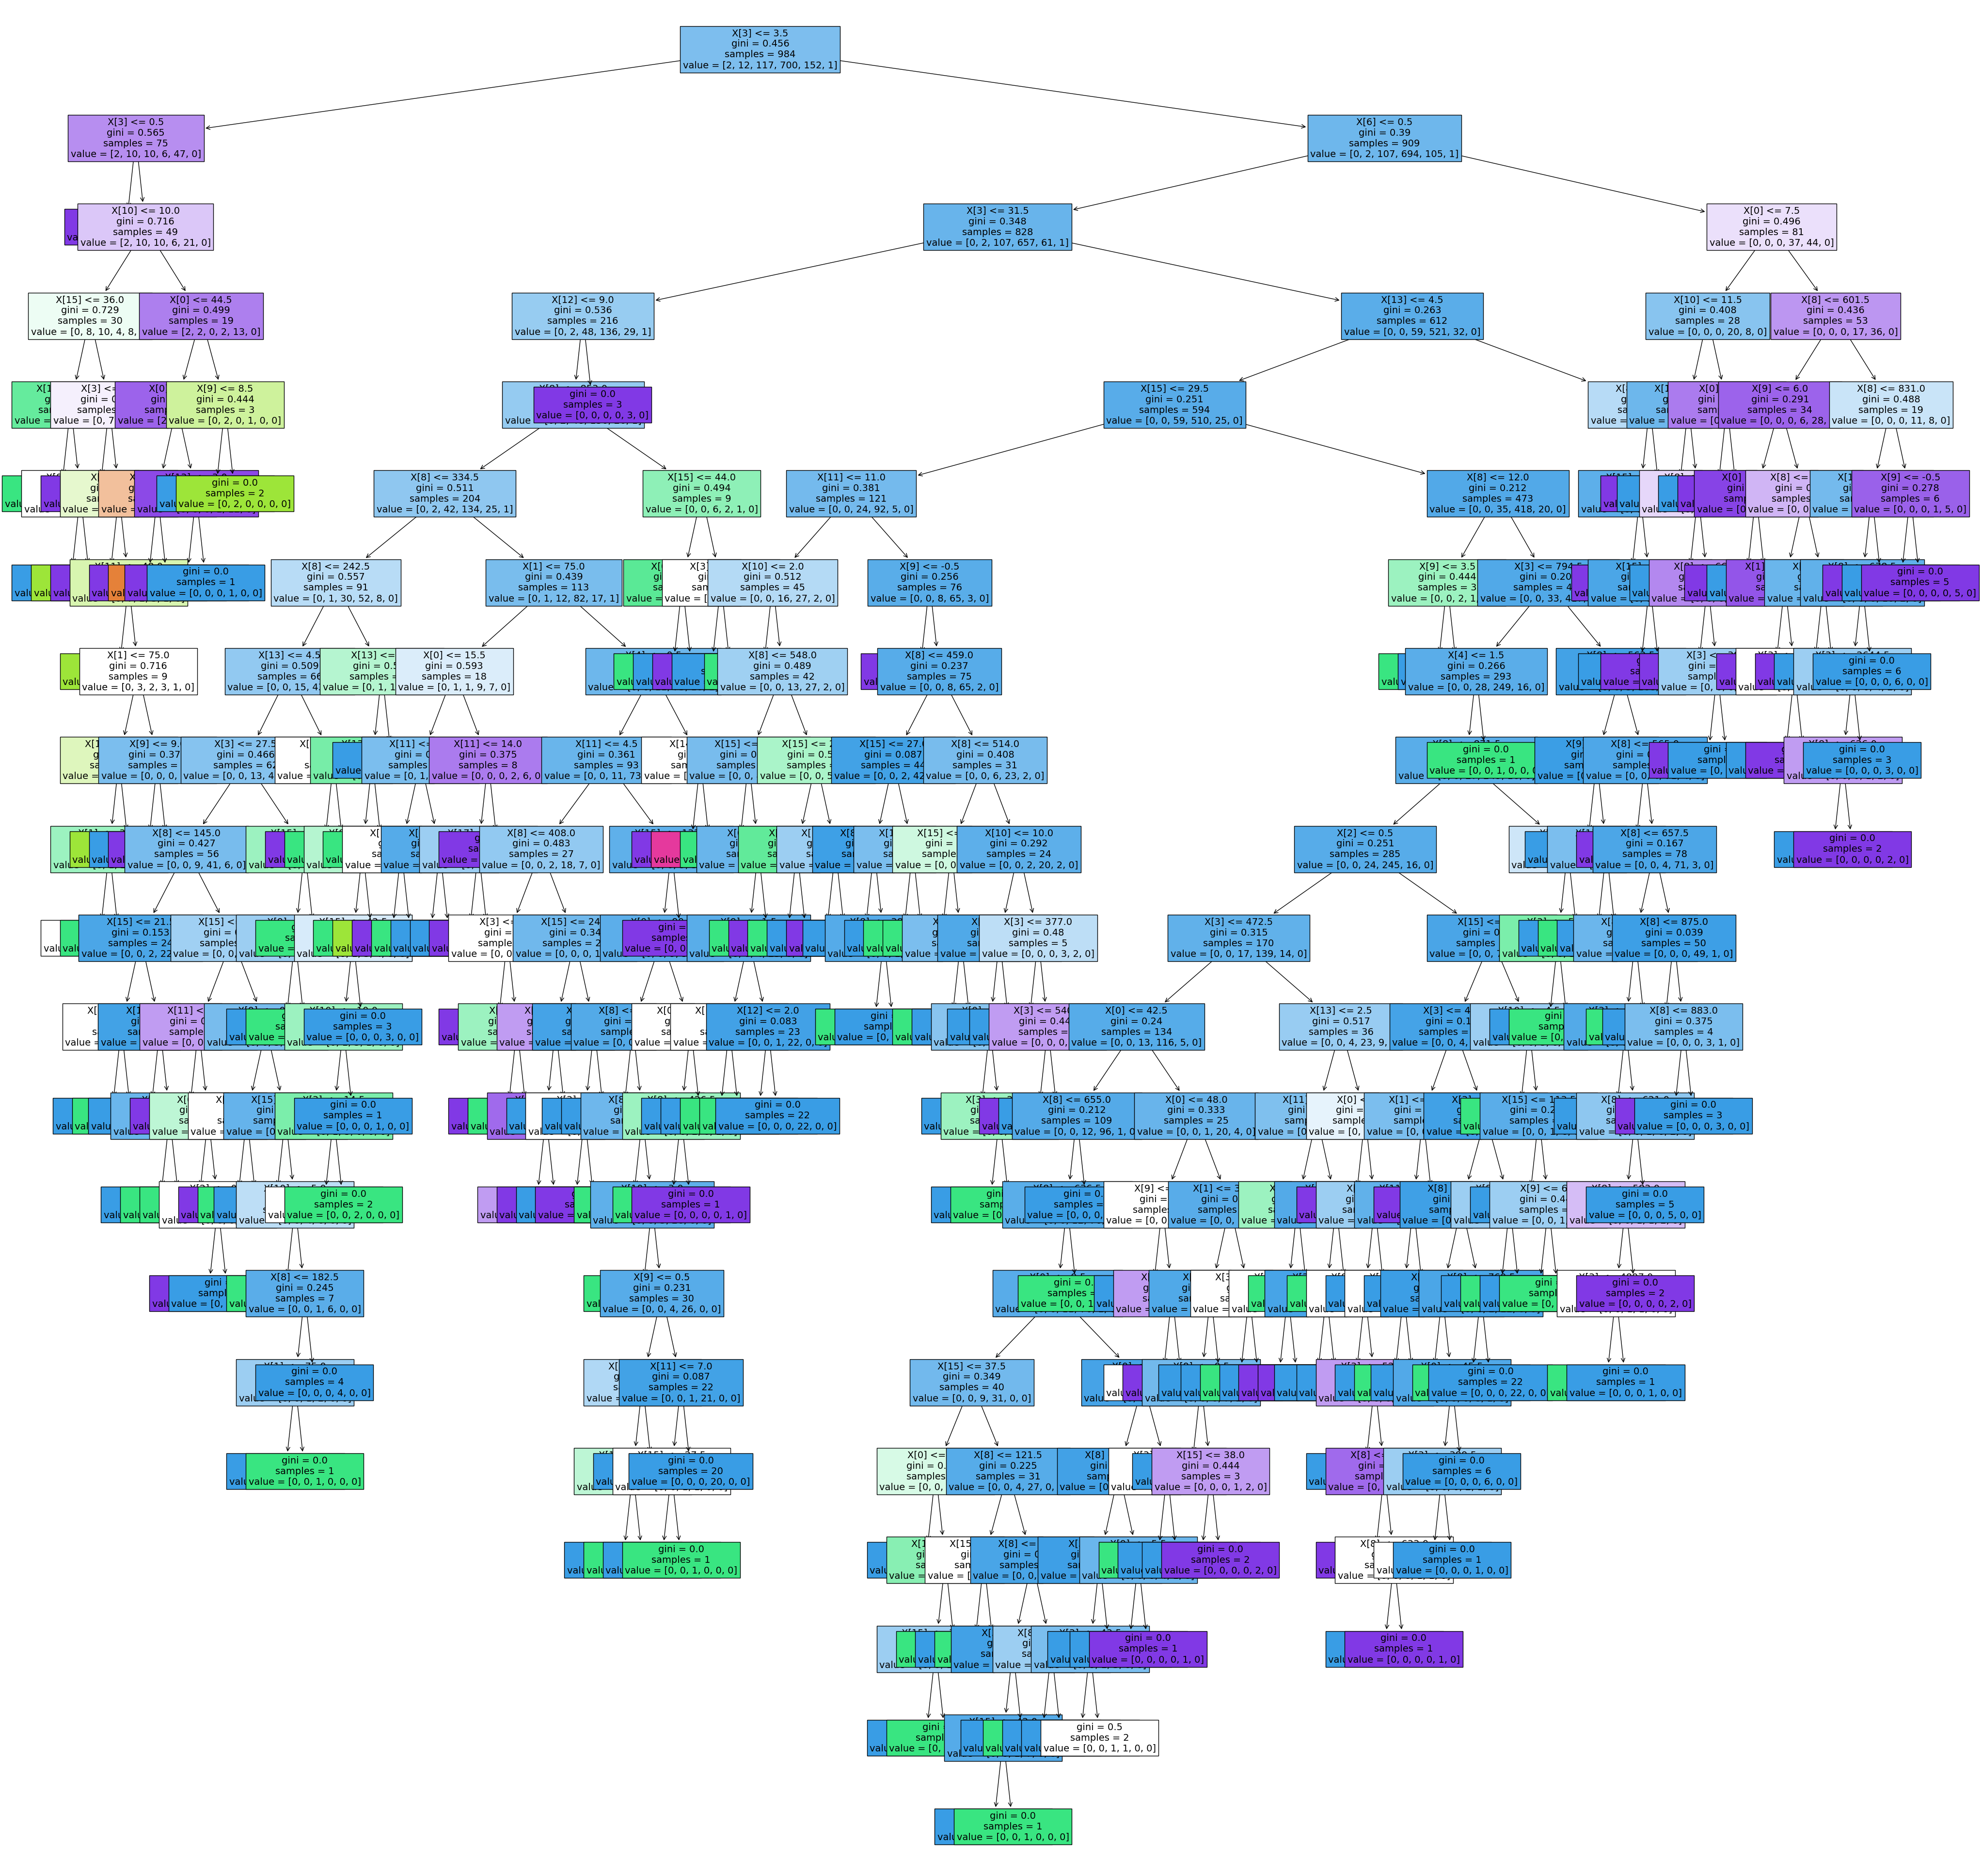

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(50,50))
tree.plot_tree(clf, filled=True, fontsize=14)

In [68]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         3.0       0.46      0.61      0.52        18
         4.0       0.79      0.66      0.72        74
         5.0       0.48      0.61      0.54        18

    accuracy                           0.65       110
   macro avg       0.43      0.47      0.45       110
weighted avg       0.68      0.65      0.66       110



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.5, 'gini = 0.456\nsamples = 984\nvalue = [2, 12, 117, 700, 152, 1]')]

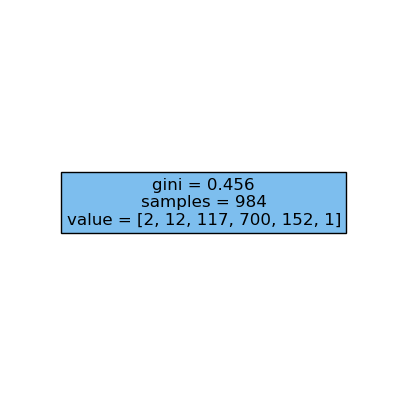

In [69]:
clf1 = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf1.fit(X_train, y_train)
plt.figure(figsize=(5,5))
tree.plot_tree(clf1, filled=True, fontsize=12)

In [70]:
y_pred=clf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        18
         4.0       0.67      1.00      0.80        74
         5.0       0.00      0.00      0.00        18

    accuracy                           0.67       110
   macro avg       0.22      0.33      0.27       110
weighted avg       0.45      0.67      0.54       110



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.4230769230769231, 0.875, 'X[3] <= 3.5\ngini = 0.456\nsamples = 984\nvalue = [2, 12, 117, 700, 152, 1]'),
 Text(0.15384615384615385, 0.625, 'X[3] <= 0.5\ngini = 0.565\nsamples = 75\nvalue = [2, 10, 10, 6, 47, 0]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 0, 26, 0]'),
 Text(0.23076923076923078, 0.375, 'X[10] <= 10.0\ngini = 0.716\nsamples = 49\nvalue = [2, 10, 10, 6, 21, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.729\nsamples = 30\nvalue = [0, 8, 10, 4, 8, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.499\nsamples = 19\nvalue = [2, 2, 0, 2, 13, 0]'),
 Text(0.6923076923076923, 0.625, 'X[6] <= 0.5\ngini = 0.39\nsamples = 909\nvalue = [0, 2, 107, 694, 105, 1]'),
 Text(0.5384615384615384, 0.375, 'X[3] <= 31.5\ngini = 0.348\nsamples = 828\nvalue = [0, 2, 107, 657, 61, 1]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.536\nsamples = 216\nvalue = [0, 2, 48, 136, 29, 1]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.263\nsamples = 612\nvalu

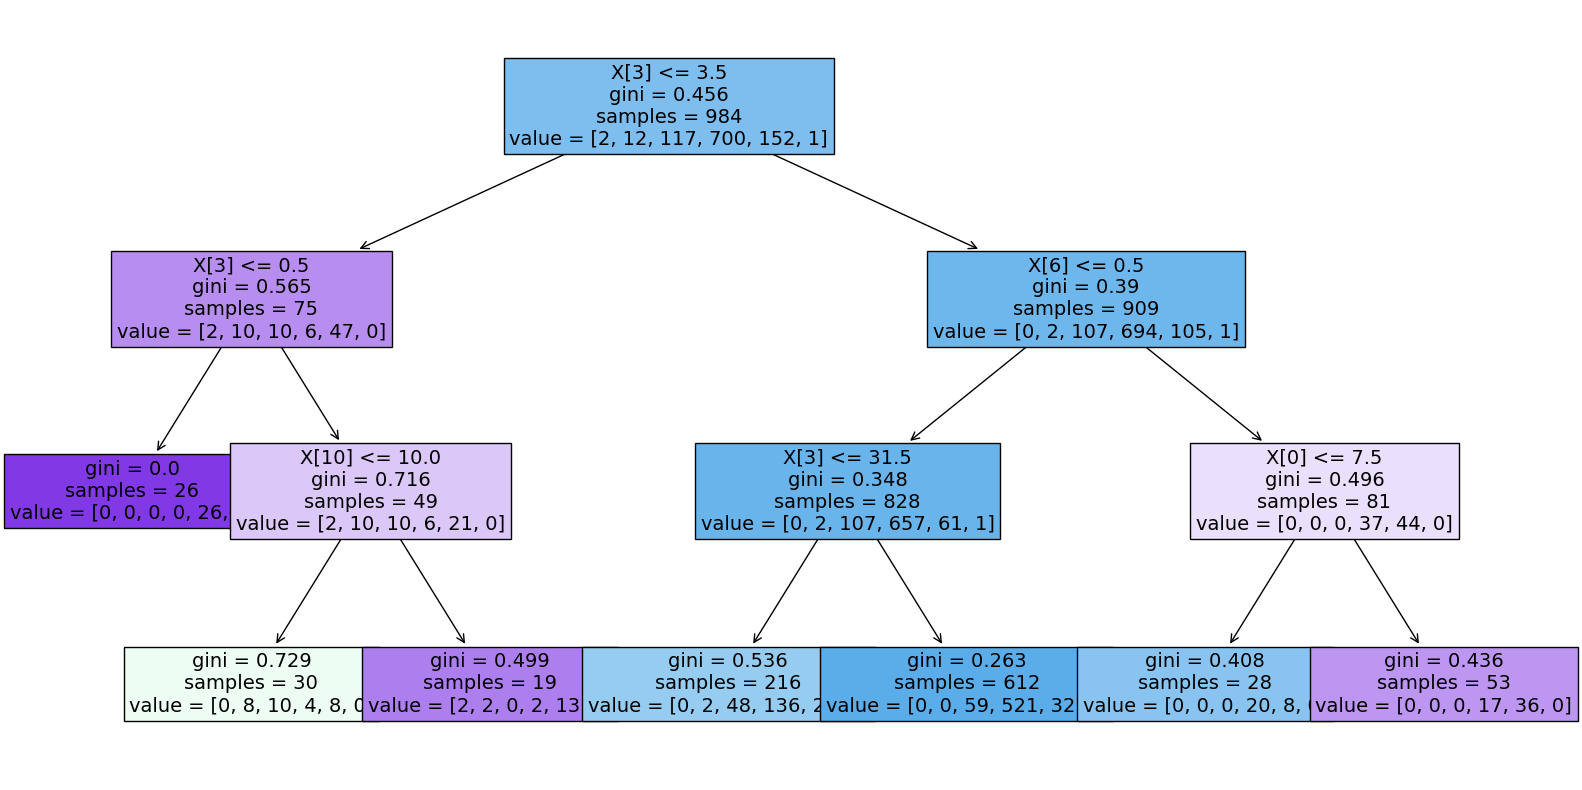

In [71]:
clf2 = tree.DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf2, filled=True, fontsize=14)

In [72]:
y_pred=clf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         3.0       1.00      0.17      0.29        18
         4.0       0.75      0.96      0.84        74
         5.0       0.75      0.50      0.60        18

    accuracy                           0.75       110
   macro avg       0.83      0.54      0.58       110
weighted avg       0.79      0.75      0.71       110



[Text(0.4230769230769231, 0.875, 'X[3] <= 3.5\ngini = 0.456\nsamples = 984\nvalue = [2, 12, 117, 700, 152, 1]'),
 Text(0.15384615384615385, 0.625, 'X[3] <= 0.5\ngini = 0.565\nsamples = 75\nvalue = [2, 10, 10, 6, 47, 0]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 0, 26, 0]'),
 Text(0.23076923076923078, 0.375, 'X[10] <= 10.0\ngini = 0.716\nsamples = 49\nvalue = [2, 10, 10, 6, 21, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.729\nsamples = 30\nvalue = [0, 8, 10, 4, 8, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.499\nsamples = 19\nvalue = [2, 2, 0, 2, 13, 0]'),
 Text(0.6923076923076923, 0.625, 'X[6] <= 0.5\ngini = 0.39\nsamples = 909\nvalue = [0, 2, 107, 694, 105, 1]'),
 Text(0.5384615384615384, 0.375, 'X[3] <= 31.5\ngini = 0.348\nsamples = 828\nvalue = [0, 2, 107, 657, 61, 1]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.536\nsamples = 216\nvalue = [0, 2, 48, 136, 29, 1]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.263\nsamples = 612\nvalu

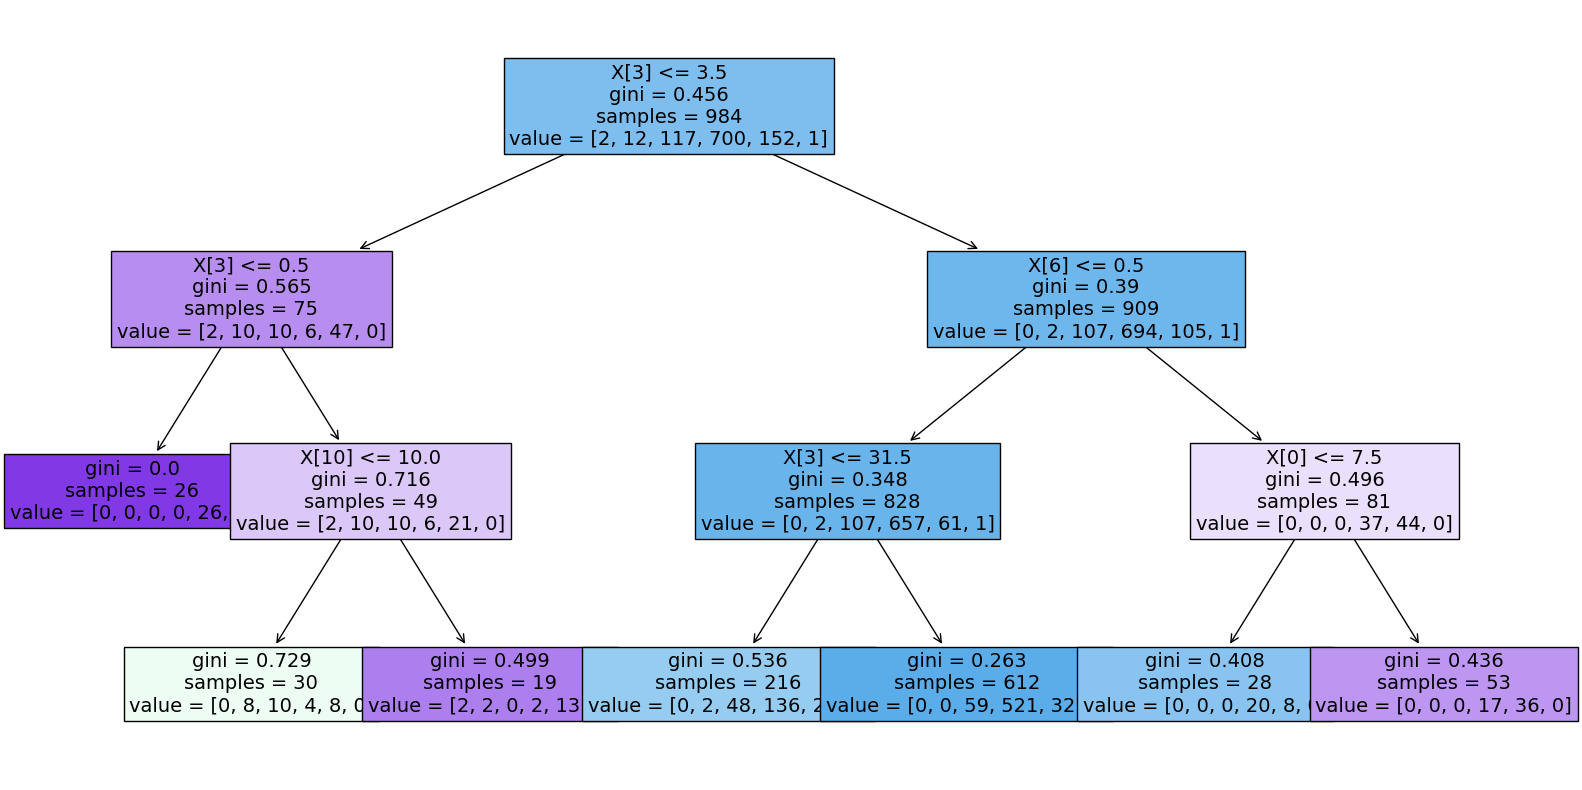

In [73]:
clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
clf3.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf3, filled=True, fontsize=14)

In [74]:
y_pred3=clf3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         3.0       1.00      0.17      0.29        18
         4.0       0.75      0.96      0.84        74
         5.0       0.75      0.50      0.60        18

    accuracy                           0.75       110
   macro avg       0.83      0.54      0.58       110
weighted avg       0.79      0.75      0.71       110



[Text(0.5, 0.875, 'X[3] <= 3.5\ngini = 0.456\nsamples = 984\nvalue = [2, 12, 117, 700, 152, 1]'),
 Text(0.25, 0.625, 'X[3] <= 0.5\ngini = 0.565\nsamples = 75\nvalue = [2, 10, 10, 6, 47, 0]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 0, 26, 0]'),
 Text(0.375, 0.375, 'gini = 0.716\nsamples = 49\nvalue = [2, 10, 10, 6, 21, 0]'),
 Text(0.75, 0.625, 'X[6] <= 0.5\ngini = 0.39\nsamples = 909\nvalue = [0, 2, 107, 694, 105, 1]'),
 Text(0.625, 0.375, 'X[3] <= 31.5\ngini = 0.348\nsamples = 828\nvalue = [0, 2, 107, 657, 61, 1]'),
 Text(0.5, 0.125, 'gini = 0.536\nsamples = 216\nvalue = [0, 2, 48, 136, 29, 1]'),
 Text(0.75, 0.125, 'gini = 0.263\nsamples = 612\nvalue = [0, 0, 59, 521, 32, 0]'),
 Text(0.875, 0.375, 'gini = 0.496\nsamples = 81\nvalue = [0, 0, 0, 37, 44, 0]')]

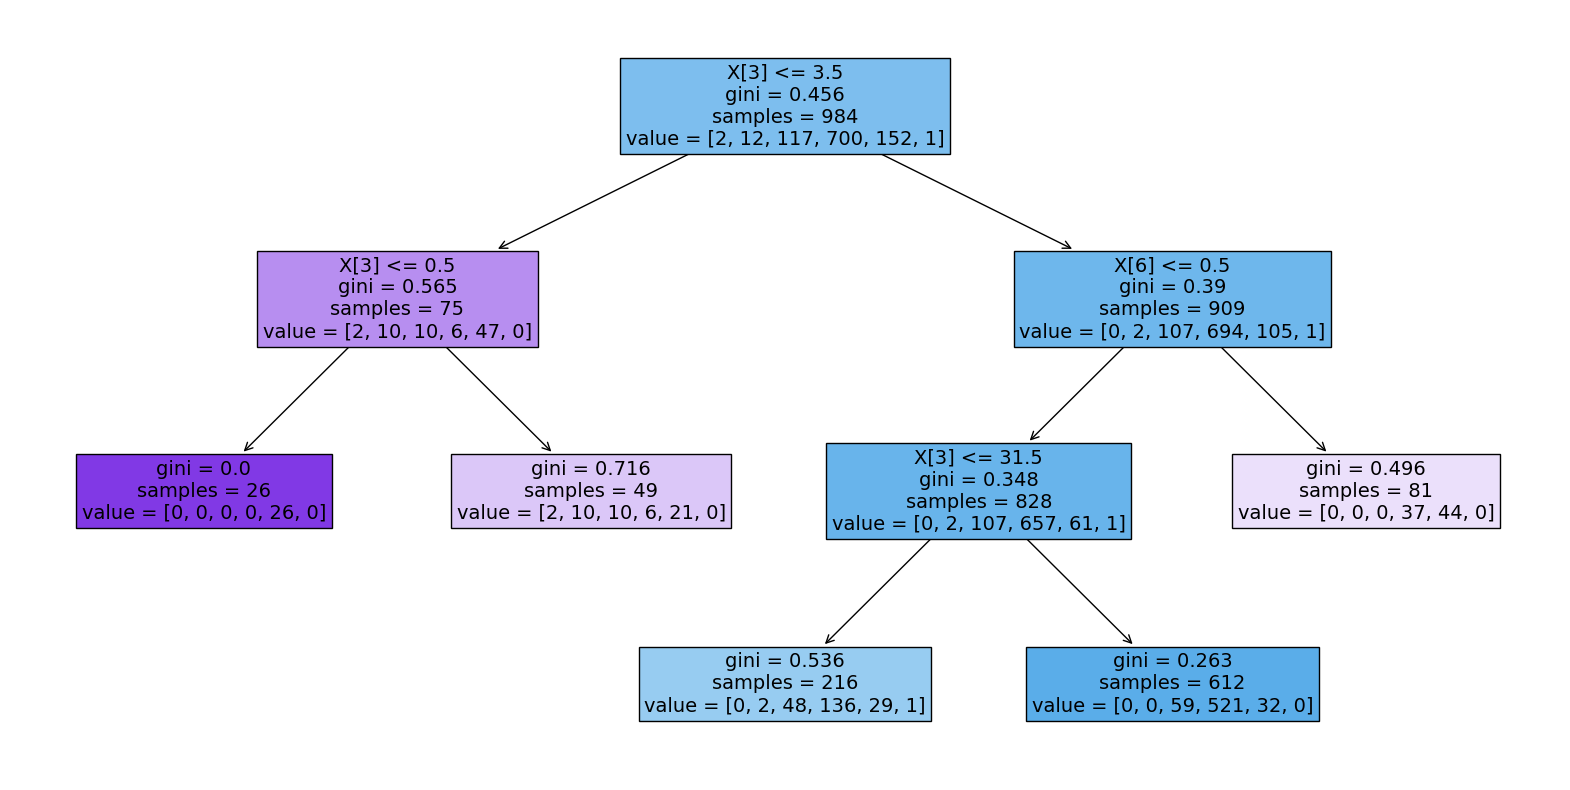

In [75]:
clf4 = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf4.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(clf4, filled=True, fontsize=14)

In [76]:
y_pred4=clf4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        18
         4.0       0.76      0.93      0.84        74
         5.0       0.58      0.61      0.59        18

    accuracy                           0.73       110
   macro avg       0.45      0.51      0.48       110
weighted avg       0.60      0.73      0.66       110



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
test_converted[xcol]

,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country
price,,,,,,,,,,,,,,,,,,
5.75,5,10,1,0,0,0,0,0,26,23,29,5,4,2,0,139,50,1
7.00,7,5000,0,579,0,0,0,0,303,1,29,50,4,2,0,31,50,1
5.00,16,1000,1,62,0,0,0,0,396,3,29,20,4,2,0,41,50,1
18.00,27,5000,1,1903,0,0,0,0,401,3,18,50,4,5,0,42,50,1
12.00,81,20000,0,1799,0,0,0,0,66,23,18,50,4,3,0,38,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.00,14,100,1,27,0,0,0,0,402,1,18,50,4,4,0,35,50,3
6.00,17,5000,1,817,0,0,0,0,365,3,3,1,4,2,0,41,50,1
4.83,51,50,1,1,0,0,0,0,357,23,29,3,4,1,0,39,50,3


In [78]:
yhat=clf3.predict(test_converted[xcol])

In [79]:
r = pd.DataFrame({'id' : test_converted['id'], 'rating': yhat})
r.to_csv('clf3.csv',index=False)

In [80]:
yhat=clf2.predict(test_converted[xcol])

In [81]:
r = pd.DataFrame({'id' : test_converted['id'], 'rating': yhat})
r.to_csv('clf2.csv',index=False)

In [82]:

# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Best: 0.711400 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.710383 (0.004560) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.711400 (0.003535) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.702563 (0.033937) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.711400 (0.003535) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.711400 (0.003535) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.703601 (0.023388) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.711400 (0.003535) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.711400 (0.003535) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.698200 (0.012654) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.711400 (0.003535) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.711400 (0.003535) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.707342 (0.007388) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.711400 (0.003535) with: {'C': 0.01, 'gamma': 'scale', 

In [83]:
yhat=grid_search.predict(test_converted[xcol])

In [84]:
r = pd.DataFrame({'id' : test_converted['id'], 'rating': yhat})
r.to_csv('svc.csv',index=False)